# Extra Credit Project - Spring 2023 - 

**Introduction**  Being in Insurance Industry for several years, I could see Data has always played a central role in Insurance Industry. Insurers are being forced to explore ways to use predictive modelling and machine learning to maintain their competitive edge, boost business operations and enhance customer satisfaction. Insurers are examining how they can take advantage of recent advances in artificial intelligence (AI) and machine learning to solve business challenges across the insurance value chain. I wanted to apply my learnings to look at a sample Medical Insurance Dataset, get some insights and used analytics tools for Medical Insurance Cost Prediction.

**Data Collection Acknowledgement** - For purpose of this analysis, I have used the dataset [Medical Cost Personal Dataset](https://www.kaggle.com/datasets/mirichoi0218/insurance?select=insurance.csv) available in Kaggle. This dataset includes several datapoints reporting insurance charges against several attributes.

**Set Up** Before starting the data exploration, we need to import the required libraries to be used for data loading, visualization and analysis

In [1]:
import numpy as np # for matrix operations
import pandas as pd # for data loading, maniplulation and analysis
import seaborn as sns # for graphics visualization
import matplotlib.pyplot as plt # for graphics visualization
from sklearn.model_selection import train_test_split # for datasetsplit
from sklearn.linear_model import LinearRegression # for models
from sklearn.metrics import mean_absolute_error, r2_score # for metrics

**Data Loading** Let us first load the data using pandas

In [2]:
mi_df=pd.read_csv("insurance.csv")
mi_df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [3]:
dp_cnt=mi_df.shape[0]

In [4]:
attr_count=mi_df.shape[1]

In [5]:
print("Total Number of datapoints :{} and the total number of attributes :{}".format(dp_cnt, attr_count))

Total Number of datapoints :1338 and the total number of attributes :7


In [6]:
attributes=mi_df.columns.values
print("attributes are ", attributes)

attributes are  ['age' 'sex' 'bmi' 'children' 'smoker' 'region' 'charges']


In previous steps, we have loaded the dataset and observered the total sample dataset size and the various attributes present in the dataset. Most of the attributes names are self-explanatory. As per CDC.gov site, **Body Mass Index (BMI)** is a person’s weight in kilograms (or pounds) divided by the square of height in meters (or feet). A high BMI can indicate high body fatness. BMI screens for weight categories that may lead to health problems, but it does not diagnose the body fatness or health of an individual.

**Data Cleansing** We will check if there is any missing values in the loaded dataset. For handling missing values, there are several techniques like removing missing datapoints, data imputation using mean/mode, regression/regression with perturbation to fill missing data. 

In [7]:
mi_df.isna()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [8]:
mi_df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Previous steps confirm there is no missing values in the loaded dataset so we are good to proceed with the next steps.

**Continue Data Exploration** Next few steps we will continue data exploration and examine various characteristics

In [9]:
mi_df.dtypes #provides the type of data each attribute hold

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [10]:
mi_df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


From previous steps, we can see age, bmi, children and charges are holding numerical data whereas sex, smoker and region consist of non-numerical object type data. The table above show some descriptive statistics data for both numerical and object attributes. We can see mean age is around 39 with highest and lowest age being 64 and 14 respectively. Out of 4 regions, southeast has highest datapoints. BMI mean is 30 which as per CDC.gov if your BMI is 30.0 or higher, it falls within the obese range. Almost 80% of datapoints have non-smoker. It will be interesting to see how the various attributes are related to each other in further analysis.

**Outliers** We are going to check if there is any outliers present in dataset. An **Outlier** is an observation point that is distant from other observations. A **box and whisker plot (also known as Boxplot)** is used to easily detect outliers. Boxplots are a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”).

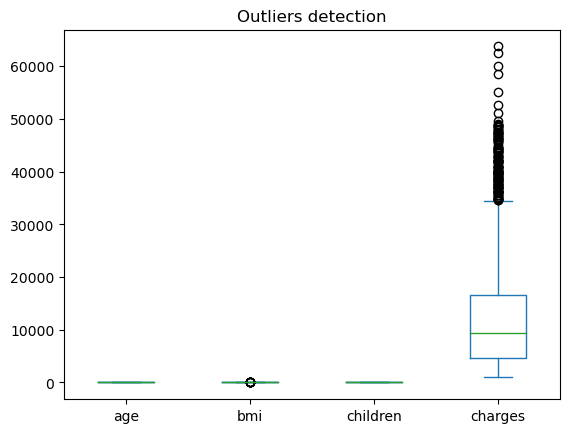

In [11]:
# outlier box plot
mi_df.plot(kind='box', title='Outliers detection')
plt.show()

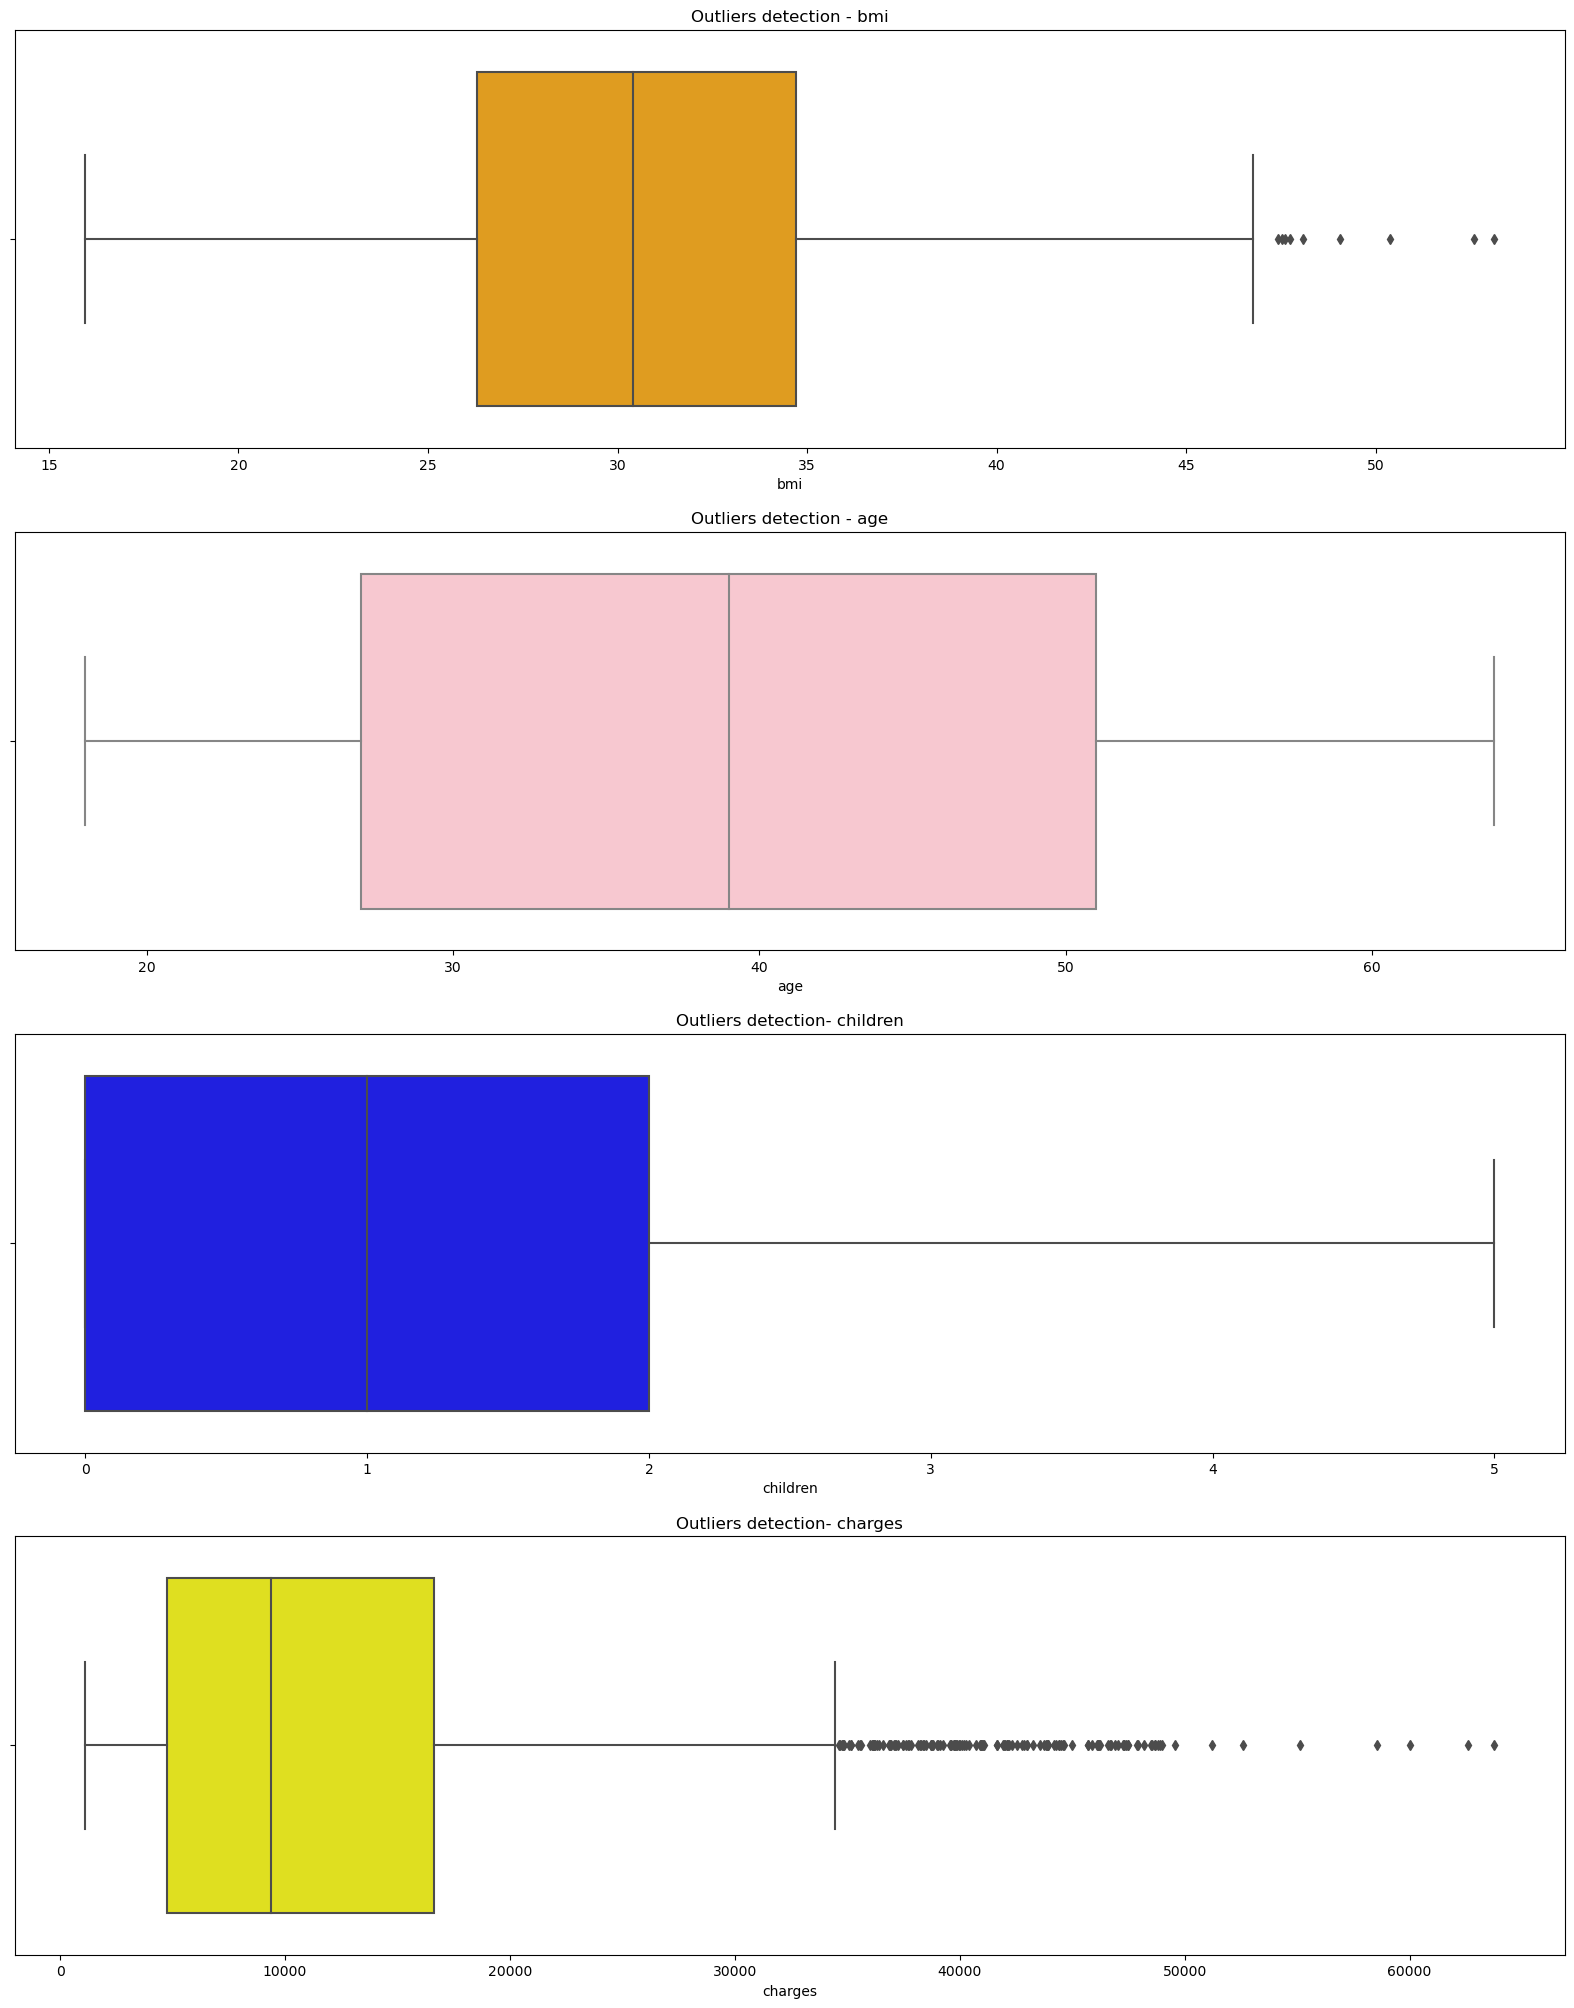

In [12]:
plt.figure(figsize=(20, 25))
plt.subplot(4, 1, 1)
sns.boxplot(x = mi_df.bmi, color='orange').set_title('Outliers detection - bmi')
plt.subplot(4, 1, 2)
sns.boxplot(x = mi_df.age, color='pink').set_title('Outliers detection - age')
plt.subplot(4, 1, 3)
sns.boxplot(x = mi_df.children, color='blue').set_title('Outliers detection- children')
plt.subplot(4, 1, 4)
sns.boxplot(x = mi_df.charges, color='yellow').set_title('Outliers detection- charges')
plt.show()

We can see above bmi and charges have outliers. Most parametric statistics are highly sensitive to outliers. Despite this, it is not advisable to drop an observation just because it is an outlier. They can be legitimate observations and it’s important to investigate the nature of the outlier before deciding whether to drop it or not. For this project, we will not investigate futher for outliers and move on to next steps keeping all the observations.

**Visualizing Pairwise Relations**

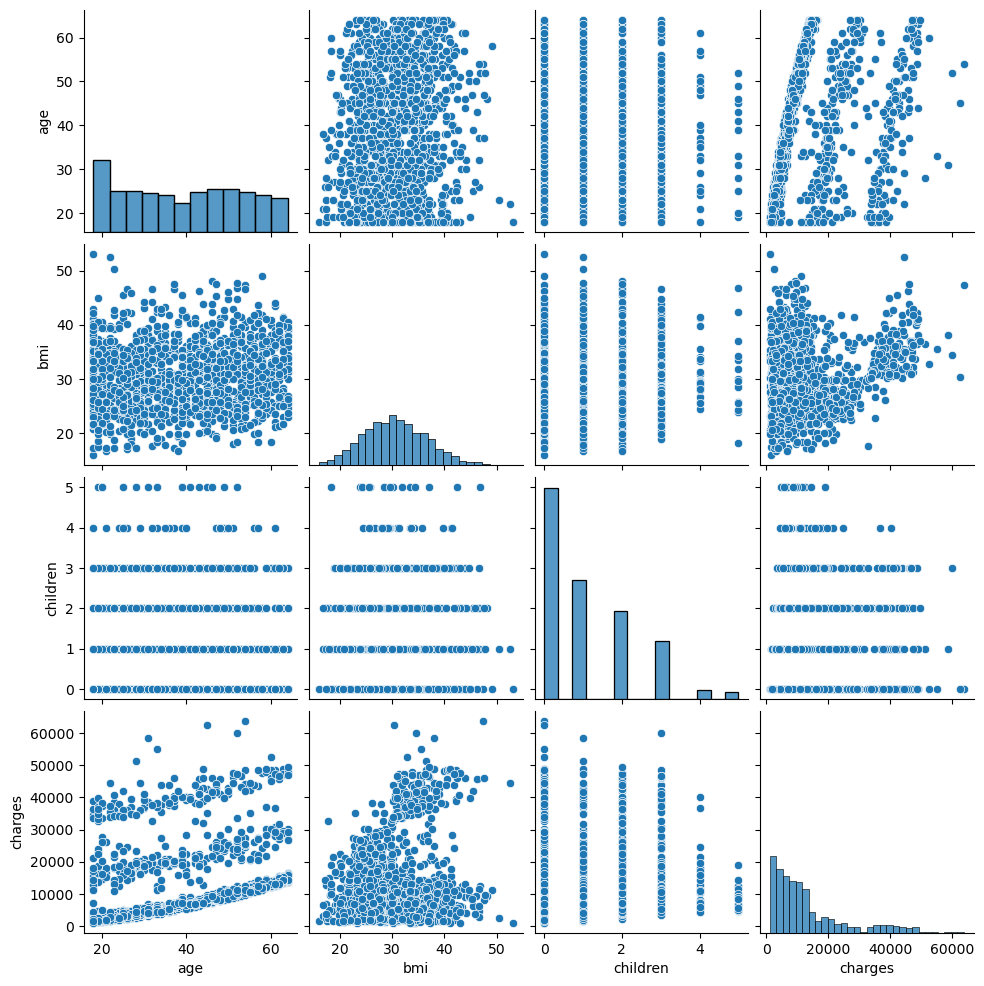

In [13]:
sns.pairplot(mi_df)

<AxesSubplot:xlabel='smoker', ylabel='charges'>

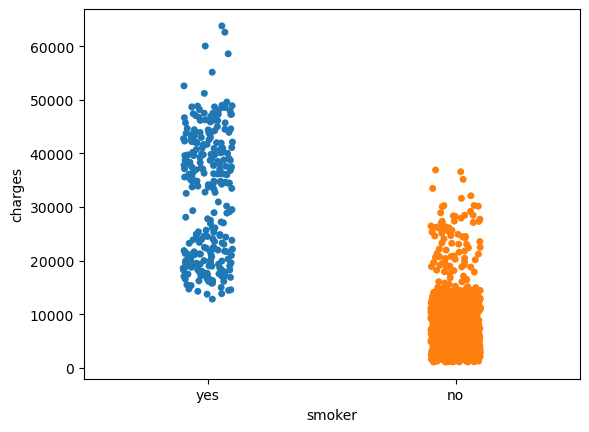

In [14]:
sns.stripplot(x="smoker", y="charges", data=mi_df) #using strip plot for categorical variable

<AxesSubplot:xlabel='region', ylabel='charges'>

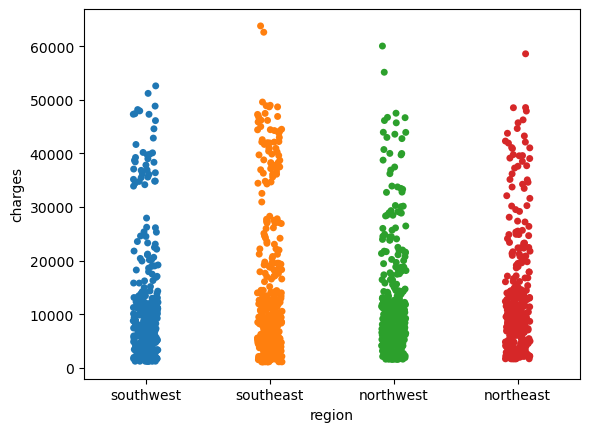

In [15]:
sns.stripplot(x="region", y="charges", data=mi_df) #using strip plot for categorical variable

<AxesSubplot:xlabel='age', ylabel='charges'>

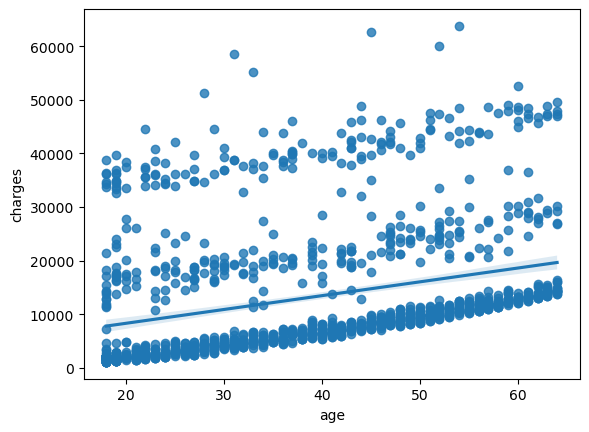

In [16]:
sns.regplot(x="age", y="charges", data=mi_df) #used for showing linear relationship

The pairplot visual shows the relationship for each pair of numerical attributes. It also draws the univariate distribution of each variable on the diagonal axes. Since the Charges have lot of outliers, it doesn't show a normal distribution as compared to bmi which has few outliers. For categorical variables, stripplot is useful and it shows charges are higher for smokers compared to non-smokers. It also shows charges are not much different across regions. The regplot above shows the linear relationshio between age and charges.

**Data Preparation** Categorical variables, unlike continuous variables, cannot by entered into the regression equation just as they are.  Instead, we need to recode them into a series of variables which can then be entered into the regression model. I have used One-Hot Encoding to create dummy variables. This technique is useful where Categorical variables order doesn't make any difference. Categorical attributes are mapped with a binary variable containing either 0 representing the absence or 1 representing the presence of that category.

In [17]:
def oh_encoding(df):    
    df_e = df    
    cols=df.columns.values.tolist()    
    catColsList=[]
    for col in cols:
        if np.issubdtype(df[col].dtype, np.number) is False:
            catColsList.append(col)
    for col in catColsList:
        col_e = pd.get_dummies(df[col], prefix=col)
        new_cols= col_e.columns.values.tolist()
        col_e[new_cols]=col_e[new_cols].astype(int)
        df_e = pd.concat((df_e, col_e), axis=1).drop(col, axis=1)
    return df_e

mi_df_encoded=oh_encoding(mi_df)
mi_df_encoded.dtypes

age                   int64
bmi                 float64
children              int64
charges             float64
sex_female            int32
sex_male              int32
smoker_no             int32
smoker_yes            int32
region_northeast      int32
region_northwest      int32
region_southeast      int32
region_southwest      int32
dtype: object

In [18]:
mi_df_encoded.head(10)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
5,31,25.740,0,3756.62160,1,0,1,0,0,0,1,0
6,46,33.440,1,8240.58960,1,0,1,0,0,0,1,0
7,37,27.740,3,7281.50560,1,0,1,0,0,1,0,0
8,37,29.830,2,6406.41070,0,1,1,0,1,0,0,0
9,60,25.840,0,28923.13692,1,0,1,0,0,1,0,0


We can see from above there is no object type or categorical attributes after encoding of sex, smoker and region variables.

**Model Creation** Next step is to create **Linear Regression** model for this encoded dataset. Since we are going to predict the charges, we will use that as target variable and rest as predictors.

In [19]:
Y=mi_df_encoded[['charges']]
X=mi_df_encoded.drop('charges', axis=1)
print(Y)
print(X)

          charges
0     16884.92400
1      1725.55230
2      4449.46200
3     21984.47061
4      3866.85520
...           ...
1333  10600.54830
1334   2205.98080
1335   1629.83350
1336   2007.94500
1337  29141.36030

[1338 rows x 1 columns]
      age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
0      19  27.900         0           1         0          0           1   
1      18  33.770         1           0         1          1           0   
2      28  33.000         3           0         1          1           0   
3      33  22.705         0           0         1          1           0   
4      32  28.880         0           0         1          1           0   
...   ...     ...       ...         ...       ...        ...         ...   
1333   50  30.970         3           0         1          1           0   
1334   18  31.920         0           1         0          1           0   
1335   18  36.850         0           1         0          1           0   

**Splitting Data** We will split(70:30) the data into train and test. Train dataset will be used for creating the model and it will be applied on test dataset for testing and accuracy checking.

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=19)
print(len(X_train), len(X_test), len(Y_train), len(Y_test))

936 402 936 402


In [21]:
X_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
240,23,36.670,2,1,0,0,1,1,0,0,0
102,18,30.115,0,1,0,1,0,1,0,0,0
776,40,32.300,2,0,1,1,0,0,1,0,0
234,39,24.510,2,0,1,1,0,0,1,0,0
1264,49,33.345,2,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
308,58,34.865,0,0,1,1,0,1,0,0,0
1043,28,25.800,0,1,0,1,0,0,0,0,1
936,44,29.735,2,0,1,1,0,1,0,0,0
757,47,27.830,0,1,0,0,1,0,0,1,0


In [22]:
Y_train

,charges
240,38511.62830
102,21344.84670
776,6986.69700
234,6710.19190
1264,10370.91255
...,...
308,11944.59435
1043,3161.45400
936,32108.66282
757,23065.42070


In [23]:
X_test

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
1001,24,32.700,0,0,1,0,1,0,0,0,1
979,36,29.920,0,1,0,1,0,0,0,1,0
96,54,30.800,3,1,0,1,0,0,0,0,1
1003,48,29.600,0,0,1,1,0,0,0,0,1
660,37,46.530,3,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
582,39,45.430,2,0,1,1,0,0,0,1,0
1068,63,21.660,1,0,1,1,0,0,1,0,0
730,35,24.420,3,0,1,0,1,0,0,1,0
1304,42,24.605,2,0,1,0,1,1,0,0,0


In [24]:
Y_test

,charges
1001,34472.84100
979,4889.03680
96,12105.32000
1003,21232.18226
660,6435.62370
...,...
582,6356.27070
1068,14349.85440
730,19361.99880
1304,21259.37795


In [42]:
lr=LinearRegression()
lm=lr.fit(X_train, Y_train)
lm_preds=lm.predict(X_test)
lm_preds

array([ 2.82689049e+04,  5.95975185e+03,  1.33671177e+04,  9.40714651e+03,
        1.33697830e+04,  1.49227467e+04,  3.94446984e+04,  7.38473083e+03,
        5.90928473e+03,  6.25288052e+03,  8.26414362e+03,  1.64190133e+04,
        1.20889333e+03,  1.69650099e+04,  4.14411415e+04,  1.20287386e+04,
        1.69096130e+04,  3.18049612e+03,  9.52143770e+03,  3.21452280e+04,
        7.40095154e+03,  4.73224468e+03,  1.20904585e+04,  1.62007121e+04,
        1.16436470e+04,  1.56783087e+04, -2.20806487e+02,  3.77745212e+04,
        8.96752765e+03,  4.01985598e+04,  1.01481144e+04,  1.37370061e+04,
        1.08176979e+04,  6.43912716e+03,  1.67950818e+03,  1.23419559e+04,
        1.46343918e+04,  6.57420996e+03,  5.55499032e+03,  5.32545490e+03,
        3.79909390e+04,  3.54761340e+04,  1.37948856e+04,  3.00821256e+04,
        3.71933142e+04,  6.94546346e+03,  3.96584225e+04,  1.18129591e+04,
        5.05580976e+03,  8.39992357e+03,  3.58383176e+04,  3.58344902e+04,
        1.21704655e+04,  

In [27]:
lm_mae = round(mean_absolute_error(Y_test, lm_preds), 2)
lm_r_squared = round(r2_score(Y_test, lm_preds), 2)

print('Mean Absolute Error:', lm_mae)
print('R Squared Score:', lm_r_squared)

Mean Absolute Error: 4465.24
R2 score: 0.74


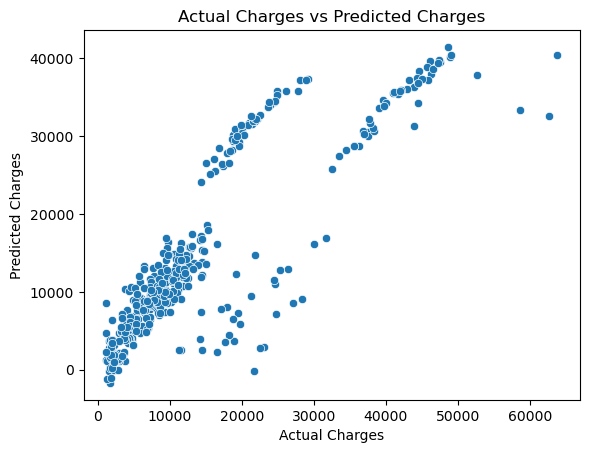

In [50]:
splot = sns.scatterplot(x=Y_test['charges'],y=lm_preds.flatten())
splot.set_title("Actual Charges vs Predicted Charges")
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.show(splot)

In the above steps, we created a linear regression model using train data and applied to test data for predictions. We compared model predictions against actual test charges  and found the Mean Absolute Error is 4465 with accuracy of 74%. How high an R-squared value should be depends on the field of study. For example, in scientific studies, the R-squared may need to be above 0.95 for a regression model to be considered reliable. In other domains, an R-squared of just 0.3 may be sufficient if there is extreme variability in the dataset. We may need to explore what R-squared values are generally acceptable for medical insurance field and accordingly try out different approaches and/or models.

**Standardiztion** Standardization is mostly performed as a pre-processing step before many machine learning models, to standardize the range of features of an input data set. For our dataset, attributes like bmi, age, encoded smoker, sex, region variables are at different scales. These differences in the ranges of initial features cause trouble for many machine learning models including linear regression model.

**Tree based algorithms** such as decision trees, random forests and gradient boosting are not sensitive to the magnitude of variables. So standardization is not needed before fitting these kinds of models. We will try out a tree based model on our input set and check if it makes any difference to R-2 score and MAE.

In [57]:
#from sklearn.ensemble import RandomForestRegressor, DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
lr=DecisionTreeRegressor()
lm=lr.fit(X_train, Y_train)
lm_preds=lm.predict(X_test)
lm_mae = round(mean_absolute_error(Y_test, lm_preds), 2)
lm_r_squared = round(r2_score(Y_test, lm_preds), 2)

print('Mean Absolute Error:', lm_mae)
print('R Squared Score:', lm_r_squared)

Mean Absolute Error: 2914.8
R Squared Score: 0.77


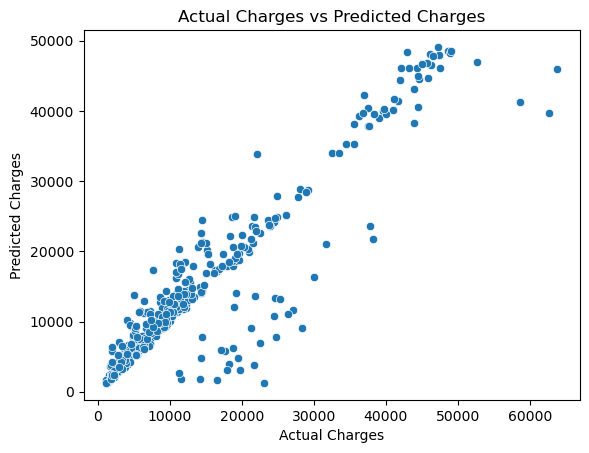

In [56]:
splot = sns.scatterplot(x=Y_test['charges'],y=lm_preds.flatten())
splot.set_title("Actual Charges vs Predicted Charges")
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.show(splot)

In [59]:
from sklearn.ensemble import RandomForestRegressor

lr=RandomForestRegressor()
lm=lr.fit(X_train, Y_train)
lm_preds=lm.predict(X_test)
lm_mae = round(mean_absolute_error(Y_test, lm_preds), 2)
lm_r_squared = round(r2_score(Y_test, lm_preds), 2)

print('Mean Absolute Error:', lm_mae)
print('R Squared Score:', lm_r_squared)

C:\Users\baner\AppData\Local\Temp\ipykernel_12888\3198753490.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  lm=lr.fit(X_train, Y_train)


Mean Absolute Error: 2624.08
R Squared Score: 0.86


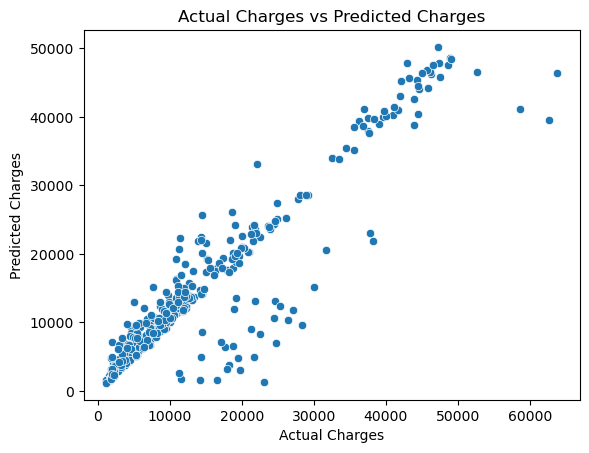

In [60]:
splot = sns.scatterplot(x=Y_test['charges'],y=lm_preds.flatten())
splot.set_title("Actual Charges vs Predicted Charges")
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.show(splot)

We can clearly see tree based algorithms produced better R2 score and MAE. Choice of models should depend on number of features, size of the dataset, explainability of results, pre-processing criteria, performance requirements and other various factors for careful consideration.